In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_movie=pd.read_csv('tmdb_5000_movies.csv')
df_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# To json to csv 

In [3]:
import json
name=['genres','keywords','production_companies','production_countries','spoken_languages']

for file in name:
    array=[]
    M=df_movie[[file]]
    h=M.values
    h=np.reshape(h,(np.shape(h)[0]))
    for i in range(len(h)):
        if h[i] == '[]':
            array.append('None')
            continue
        d=json.loads(h[i])
        array.append(d[0]["name"])
    df_name=pd.DataFrame(array)
    df_name=df_name.rename(columns={0:"file"})
    df_movie[file]=df_name

In [4]:
df_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162.0,English,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148.0,Français,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action,http://www.thedarkknightrises.com/,49026,dc comics,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action,http://movies.disney.com/john-carter,49529,based on novel,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df_movie.to_csv('processing.csv')

In [6]:
df_po=pd.read_csv('processing.csv')

In [7]:
po=df_po['production_countries']

In [8]:
print(po)

0       United States of America
1       United States of America
2                 United Kingdom
3       United States of America
4       United States of America
                  ...           
4798                      Mexico
4799                        None
4800    United States of America
4801    United States of America
4802    United States of America
Name: production_countries, Length: 4803, dtype: object


In [9]:
print(np.shape(po))

(4803,)


In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder


po=np.matrix(po).reshape(((np.shape(po)[0]),1))

mk=LabelEncoder()
mk.fit(po)
po=mk.transform(po)

c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
print(po)

[70 70 69 ... 70 70 70]


<AxesSubplot:xlabel='label', ylabel='count'>

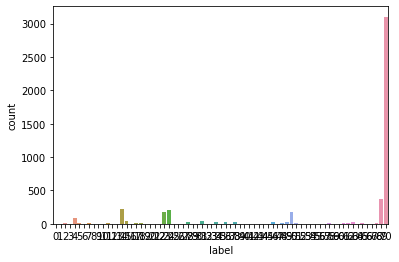

In [12]:
import seaborn as sns
df=pd.DataFrame()
df["label"]=po
lab=df['label']
sns.countplot(lab)

In [13]:
name=mk.inverse_transform(po)
print(name[-1])

United States of America


# 1. What areas have the most influence on revenue?

In [14]:
print('areas have the most influence on revenue is : '+name[-1])

areas have the most influence on revenue is : United States of America


# 2 How is a movie’s revenue and average score affected by its genre?

In [15]:
x1=df_po[['genres']]
x1=np.matrix(x1).reshape(((np.shape(x1)[0]),1))
mk.fit(x1)
X1=mk.transform(x1)
X2=df_po[['revenue']]
X3=df_po[['vote_average']]

c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


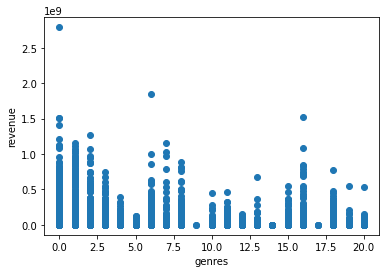

In [16]:
plt.scatter(X1, X2)
plt.xlabel('genres')
plt.ylabel('revenue')
plt.show()

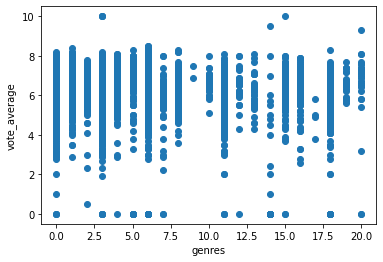

In [17]:
plt.scatter(X1, X3)
plt.xlabel('genres')
plt.ylabel('vote_average')
plt.show()

In [18]:
df1=pd.DataFrame(X1)
df1=df1.rename(columns={0:'genres'})

In [19]:
T1=df_po[['revenue', 'vote_average', 'genres']]

In [20]:
T1['genres']=df1

c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


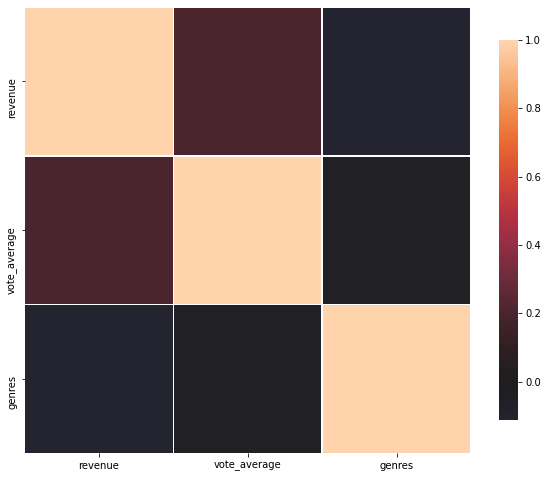

In [21]:
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(T1)

# 3 What influence does release date have on revenue?

In [22]:
T=df_po[['release_date', 'revenue']]

In [23]:
T['release_date'] = pd.to_datetime(T['release_date'],infer_datetime_format=True)

c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
T.head()

,release_date,revenue
0,2009-12-10,2787965087
1,2007-05-19,961000000
2,2015-10-26,880674609
3,2012-07-16,1084939099
4,2012-03-07,284139100


In [25]:
T['year'] = T['release_date'].dt.year 
T['month'] = T['release_date'].dt.month 
T['day'] = T['release_date'].dt.day 

c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\abc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [26]:
T.head()

,release_date,revenue,year,month,day
0,2009-12-10,2787965087,2009.0,12.0,10.0
1,2007-05-19,961000000,2007.0,5.0,19.0
2,2015-10-26,880674609,2015.0,10.0,26.0
3,2012-07-16,1084939099,2012.0,7.0,16.0
4,2012-03-07,284139100,2012.0,3.0,7.0


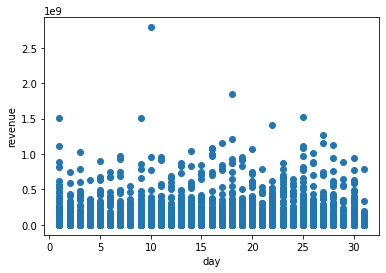

In [27]:
plt.scatter(T['day'], T['revenue'])
plt.xlabel('day')
plt.ylabel('revenue')
plt.show()

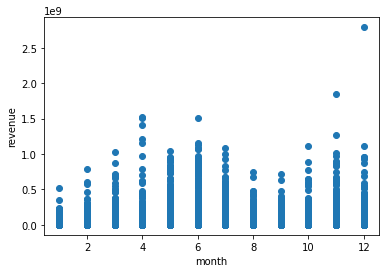

In [28]:
plt.scatter(T['month'], T['revenue'])
plt.xlabel('month')
plt.ylabel('revenue')
plt.show()

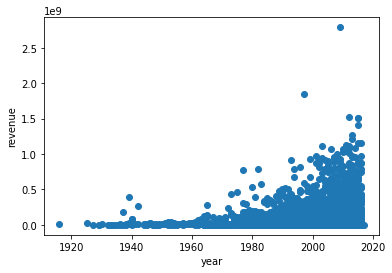

In [29]:
plt.scatter(T['year'], T['revenue'])
plt.xlabel('year')
plt.ylabel('revenue')
plt.show()

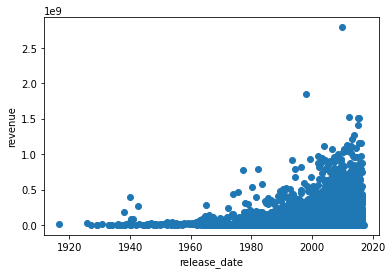

In [30]:
fig, ax = plt.subplots()
plt.plot_date(T['release_date'], T['revenue'])
plt.xlabel('release_date')
plt.ylabel('revenue')
plt.show()